Own implementation of cat vs non cats challenge  (12/2020)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
#from lr_utils import load_dataset

from sklearn.linear_model import LogisticRegressionCV


%matplotlib inline
np.random.seed(1)

In [6]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [7]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

In [8]:
# majority class prediction

# if predict all ones : 34 % of ones in the training set
np.sum(train_set_y_orig)/train_set_y_orig.size

# if predict all ones : 66 % of ones in the test set
np.sum(test_set_y_orig)/test_set_y_orig.size

0.66

In [9]:
m =  train_set_x_orig.shape[0] # pictures training set

In [10]:
# reshape and normalize the data
X_train = np.reshape(train_set_x_orig, (train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],-1))
Y_train = train_set_y_orig
X_train = X_train/255
m1      = X_train.shape[1]

X_test  = np.reshape(test_set_x_orig,(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3],-1))
X_test  = X_test/255
m2      = X_test.shape[1]

Y_test  = test_set_y_orig

In [11]:
####### Essayer régression logistique

clf = LogisticRegressionCV(random_state=3, max_iter = 3000).fit(X_train.T, np.ravel(Y_train))
Prediction = clf.predict(X_test.T)

print("Logistic regression gives an accuracy of " + str(100- np.mean(np.abs(Prediction - Y_test))*100) + " %")


Logistic regression gives an accuracy of 34.0 %


In [12]:
def ReLu(x):
    return np.maximum(0,x)

In [13]:
def ReLu_prime(z):
    return (z>0)*1.0

In [14]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))

In [15]:
def Sigmoid_prime(z):
    return Sigmoid(z)*(1-Sigmoid(z))

In [16]:
def Init_parameters(X,y,L,Num_units_in_hidden_layers):
    
    m                          = X.shape[1]   # examples 
    Num_units_in_hidden_layers = np.reshape(Num_units_in_hidden_layers,(Num_units_in_hidden_layers.size,-1))
    
    if (Num_units_in_hidden_layers.size != (L-1)):
        print('The number of units in the hidden layer are not consistent with the number of layers')
    else:
        print('Initializing the parameters for a network with ' + str(L-1) + ' hidden layers')
        print('Number of units in hidden layers : ' + str(Num_units_in_hidden_layers.T))

    
    Num_u            = np.ones((L+1,1))    
    Num_u[0]         = X.shape[0]
    Num_u[-1]        = 1
    Num_u[1:-1]      = Num_units_in_hidden_layers
                
    W_weights        = {}
    B_biases         = {}

    for u in range(L):
        W_weights["W_" + str(int(u+1))] =  np.random.randn(int(Num_u[u+1]),int(Num_u[u])) / np.sqrt(Num_u[u])
        B_biases["B_" + str(int(u+1))]  =  np.zeros((int(Num_u[u+1]),1)) 
        
    A_activations    = {}  # activation functions    
    for u in range(L+1):    
        if u == 0:
            A_activations["A_0"] = X
        else:    
            A_activations["A_" + str(int(u))]  = np.zeros((int(Num_u[int(u)]),m))
    
    Z_scores         = {} #scores                
    for u in range(1,L+1):
            Z_scores["Z_" + str(int(u))]       = np.zeros((int(Num_u[int(u)]),m))
          
    G_non_lin            = {}
    G_non_lin_derivative = {}
    for u in range(L):    
        if u != (L-1):
            G_non_lin["g_" + str(int(u+1))] = ReLu
            G_non_lin_derivative["g'_" + str(int(u+1))] = ReLu_prime
        else:
            G_non_lin["g_" + str(int(u+1))] = Sigmoid
            G_non_lin_derivative["g'_" + str(int(u+1))] = Sigmoid_prime

   
    return W_weights,B_biases, Z_scores, A_activations, G_non_lin, G_non_lin_derivative

In [17]:
L = 3
W_weights,B_biases,Z_scores,A_activations,G_non_lin,G_non_lin_derivative = Init_parameters(X_train,Y_train,L,np.array([[5],[6]]))



Initializing the parameters for a network with 2 hidden layers
Number of units in hidden layers : [[5 6]]


In [18]:
def Compute_cost(A_s,Y,L):
    m      = Y.size
    A_end  = A_s["A_"+str(L)]
    J      = np.sum(-(1-Y)*np.log(1-A_end)-Y*np.log(A_end))/m # compute 
    return J

In [19]:
#A_activations["A_3"] = Sigmoid(.9*Y_train +  np.random.rand(1,209)*.001)
#Compute_cost(A_activations,Y_train,L)

In [20]:
print(A_activations["A_0"].shape)
print(W_weights["W_1"].shape)

(12288, 209)
(5, 12288)


In [21]:
def Forward_pass(L, W_weights,B_biases, Z_scores, A_activations,G_non_lin):

    for u in range(L):
        Z_scores["Z_" + str(int(u+1))]      = np.dot(W_weights["W_" + str(int(u+1))],A_activations["A_" + str(int(u))]) + B_biases["B_" + str(int(u+1))]
        A_activations["A_" + str(int(1+u))] = G_non_lin["g_"+ str(int(u+1))](Z_scores["Z_" + str(int(u+1))])
    
    return A_activations,Z_scores

In [22]:
def Back_propagation(A_activations,W_weights,Z_scores,Y,L,G_non_lin_derivative):
    
    m                    = Y.size
    A_end                = A_activations["A_"+str(L)]
    Delta_activations_dA = {}
    Delta_scores_dZ      = {}
    dW_s                 = {}
    dB_s                 = {}
    Delta_activations_dA["dA_"+ str(int(L))]   = -np.divide(Y,A_end)  +  np.divide(1-Y,1-A_end)
  
       
    for u in range(L,0,-1):    
        Delta_scores_dZ["dZ_"+ str(int(u))]            =  Delta_activations_dA["dA_" + str(int(u))]*G_non_lin_derivative["g'_" + str(int(u))](Z_scores["Z_" + str(int(u))]) 
        dW_s["dW_"+ str(int(u))]                       =  np.dot(Delta_scores_dZ["dZ_"+ str(int(u))],A_activations["A_"+str(u-1)].T)/m
        dB_s["dB_"+ str(int(u))]                       =  np.sum(Delta_scores_dZ["dZ_"+ str(int(u))],axis = 1,keepdims = True)/m
        Delta_activations_dA["dA_" + str(int(u-1))]    =  np.dot(W_weights["W_" + str(int(u))].T,Delta_scores_dZ["dZ_"+ str(int(u))]) 
 
                         
    return dW_s,dB_s

In [23]:
def Update_parameters(Weigth_matrices,dW_s,B_biases,dB_s,Learning_rate):
    for u in range(1,len(Weigth_matrices)):      
        Weigth_matrices["W_"+str(u)] =  Weigth_matrices["W_"+str(u)]  - Learning_rate*dW_s["dW_"+ str(u)]
        B_biases["B_"+str(u)]        =  B_biases["B_"+str(u)]  - Learning_rate*dB_s["dB_"+ str(u)]
  
    return Weigth_matrices,B_biases

In [24]:
def Modele_Deep_network(X_train, Y_train, X_test, Y_test, Learning_rate, Num_iterations, L, Num_units_in_hidden_layers):
    
    W_weights,B_biases, Z_scores, A_activations, G_non_lin,G_non_lin_derivative = Init_parameters(X_train,Y_train,L,Num_units_in_hidden_layers)
             
    Cost_list      = [] 
    Iteration_list = [] 
    for num_iter in range(Num_iterations+1):
            A_activations,Z_scores = Forward_pass(L, W_weights,B_biases, Z_scores, A_activations,G_non_lin)
            dW_s,dB_s              = Back_propagation(A_activations,W_weights,Z_scores,Y_train,L,G_non_lin_derivative) 
            W_weights, B_biases    = Update_parameters(W_weights,dW_s,B_biases,dB_s,Learning_rate)
        
            if (num_iter%50 == 0):
                Cost = Compute_cost(A_activations,Y_train,L)
                print("Cost after the "+ str(num_iter) +"(st) iteration : " + str(Cost)) 
                Cost_list.append(Cost) 
                Iteration_list.append(num_iter)
    
    #Accuracy on the train set
    Preds_train = np.round(A_activations["A_"+str(L)])
    print("Accuracy on the train set : " + str(100- np.mean(np.absolute(Preds_train - Y_train))*100))

    #Accuracy on the test set
    W_weights2,B_biases2, Z_scores2, A_activations2, G_non_lin,G_non_lin_derivative  = Init_parameters(X_test,Y_test,L,Num_units_in_hidden_layers)
    A_activations2,x = Forward_pass(L, W_weights2,B_biases2, Z_scores2, A_activations2,G_non_lin)
    Preds_test       = np.round(A_activations2["A_"+str(L)])
    print("Accuracy on the test set : " + str(np.mean((Preds_test == Y_test))*100))
       
    d = {}
    d['W'] = W_weights
    d['B'] = B_biases
    d['Acc train set'] = Preds_train
    d['Acc test set']  = Preds_test
    d['Cost'] = Cost_list
    d['Iteration'] = Iteration_list
        
    print(Preds_train)    
    print(Preds_test)    
    
    return d

Initializing the parameters for a network with 2 hidden layers
Number of units in hidden layers : [[20 10]]
Cost after the 0(st) iteration : 0.6512524117997981
Cost after the 50(st) iteration : 0.5937923997236819
Cost after the 100(st) iteration : 0.5702793553907555
Cost after the 150(st) iteration : 0.5505711766482887
Cost after the 200(st) iteration : 0.5345562156146731
Cost after the 250(st) iteration : 0.5217041498171608
Cost after the 300(st) iteration : 0.5120691110079051
Cost after the 350(st) iteration : 0.5018534610276619
Cost after the 400(st) iteration : 0.4925559040050609
Cost after the 450(st) iteration : 0.48141886378262994
Cost after the 500(st) iteration : 0.47671691923633425
Cost after the 550(st) iteration : 0.4682896814840153
Cost after the 600(st) iteration : 0.4599982864590124
Cost after the 650(st) iteration : 0.4487747761976952
Cost after the 700(st) iteration : 0.44352094140188636
Cost after the 750(st) iteration : 0.43682544438448273
Cost after the 800(st) iter

Cost after the 7300(st) iteration : 0.06473875883373419
Cost after the 7350(st) iteration : 0.06401306855334692
Cost after the 7400(st) iteration : 0.06291166846326414
Cost after the 7450(st) iteration : 0.062213353058875785
Cost after the 7500(st) iteration : 0.06163422692981785
Cost after the 7550(st) iteration : 0.06083722723941468
Cost after the 7600(st) iteration : 0.05990268709181158
Cost after the 7650(st) iteration : 0.05944859603048854
Cost after the 7700(st) iteration : 0.05847748315417149
Cost after the 7750(st) iteration : 0.057751606181173164
Cost after the 7800(st) iteration : 0.05722106254883722
Cost after the 7850(st) iteration : 0.05643632521305065
Cost after the 7900(st) iteration : 0.05581749997922615
Cost after the 7950(st) iteration : 0.05525505848949399
Cost after the 8000(st) iteration : 0.054661499400532006
Cost after the 8050(st) iteration : 0.05397709014052014
Cost after the 8100(st) iteration : 0.05333422724657605
Cost after the 8150(st) iteration : 0.0526884

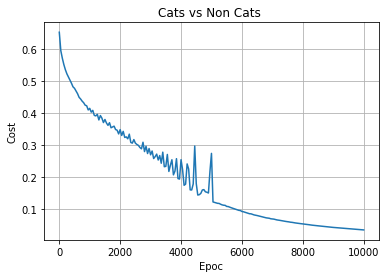

In [31]:
# try the model on with a one hidden layer
Learning_rate  = 0.0025
Num_iterations = 10000
L              = 3 # L-1 hidden layers
Num_units_in_hidden_layers = np.array([[20],[10]])

d1 = Modele_Deep_network(X_train, Y_train, X_test, Y_test, Learning_rate, Num_iterations, L, Num_units_in_hidden_layers)
    

fig, ax = plt.subplots()
ax.plot(d1["Iteration"], d1["Cost"])

ax.set(xlabel='Epoc', ylabel='Cost',
       title='Cats vs Non Cats ')
ax.grid()   
    